<a href="https://colab.research.google.com/github/Tejasree-Goli/CMPE-257-Project/blob/main/05_KNN_Pavan_Satyam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
!pip install scikit-plot
import scikitplot as skplt
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install stop_words

# NLP modules
import nltk
import re 
import string
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob , Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=d4652ca85bf2c50b828195d376264af2aa3482ced1e7ce0b2ec505b9f32f53ec
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
color = sns.color_palette()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]   

True

In [ ]:
reviews_df=pd.read_csv('/content/drive/MyDrive/cmpe257/merged.csv')
reviews_df.head(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.userCity,reviews.userProvince,asins,colors,dimension,imageURLs,primaryCategories,sourceURLs,weight
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AV13V_i2glJLPUi8PFgb,Toshiba,"Internal Solid State Drives,Computers & Access...",2017-07-25T01:24:00Z,2018-06-01T19:31:33Z,NaN,toshiba3tbinternalserialataiiiharddrivefordesk...,NaN,PH3300U-1I72,Toshiba - 3TB Internal Serial ATA III Hard Dri...,...,NaN,NaN,NaN,B009E6J1BU,NaN,NaN,https://images-na.ssl-images-amazon.com/images...,Electronics,http://www.bestbuy.com/site/toshiba-3tb-intern...,2 ounces
2,AV13V_i2glJLPUi8PFgb,Toshiba,"Internal Solid State Drives,Computers & Access...",2017-07-25T01:24:00Z,2018-06-01T19:31:33Z,NaN,toshiba3tbinternalserialataiiiharddrivefordesk...,NaN,PH3300U-1I72,Toshiba - 3TB Internal Serial ATA III Hard Dri...,...,NaN,NaN,NaN,B009E6J1BU,NaN,NaN,https://images-na.ssl-images-amazon.com/images...,Electronics,http://www.bestbuy.com/site/toshiba-3tb-intern...,2 ounces
3,AV13V_i2glJLPUi8PFgb,Toshiba,"Internal Solid State Drives,Computers & Access...",2017-07-25T01:24:00Z,2018-06-01T19:31:33Z,NaN,toshiba3tbinternalserialataiiiharddrivefordesk...,NaN,PH3300U-1I72,Toshiba - 3TB Internal Serial ATA III Hard Dri...,...,NaN,NaN,NaN,B009E6J1BU,NaN,NaN,https://images-na.ssl-images-amazon.com/images...,Electronics,http://www.bestbuy.com/site/toshiba-3tb-intern...,2 ounces
4,AV13V_i2glJLPUi8PFgb,Toshiba,"Internal Solid State Drives,Computers & Access...",2017-07-25T01:24:00Z,2018-06-01T19:31:33Z,NaN,toshiba3tbinternalserialataiiiharddrivefordesk...,NaN,PH3300U-1I72,Toshiba - 3TB Internal Serial ATA III Hard Dri...,...,NaN,NaN,NaN,B009E6J1BU,NaN,NaN,https://images-na.ssl-images-amazon.com/images...,Electronics,http://www.bestbuy.com/site/toshiba-3tb-intern...,2 ounces


In [ ]:
reviews_df.shape

(78343, 32)

In [ ]:
#Columns/attributes and their datatypes
reviews_df.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateSeen         object
reviews.doRecommend      object
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.username         object
upc                      object
reviews.dateAdded        object
reviews.didPurchase      object
reviews.id              float64
reviews.userCity         object
reviews.userProvince     object
asins                    object
colors                   object
dimension                object
imageURLs                object
primaryCategories        object
sourceURLs               object
weight  

In [ ]:
reviews_df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     36327
keys                        0
manufacturer             2808
manufacturerNumber        203
name                        0
reviews.date              128
reviews.dateSeen            0
reviews.doRecommend     12006
reviews.numHelpful      40022
reviews.rating            164
reviews.sourceURLs          0
reviews.text               41
reviews.title             480
reviews.username           96
upc                         2
reviews.dateAdded        7299
reviews.didPurchase     46185
reviews.id              46185
reviews.userCity        72933
reviews.userProvince    77894
asins                   71044
colors                  73063
dimension               72253
imageURLs               71044
primaryCategories       71044
sourceURLs              71044
weight                  71044
dtype: int64

In [ ]:
reviews_df = reviews_df.dropna(subset=['reviews.text']) #dropping null reviews text
reviews_df = reviews_df.dropna(subset=['reviews.title']) #dropping null reviews title
reviews_df = reviews_df.dropna(subset=['reviews.rating']) #dropping null ratings

In [ ]:
reviews_df.shape

(77670, 32)

Checking the duplicate rows and dropping them

In [ ]:
reviews_df.duplicated(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date']).sum()

761

In [ ]:
reviews_df=reviews_df.drop_duplicates(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date'])

In [ ]:
reviews_df.shape

(76909, 32)

Making title and review as one sentence

In [ ]:
reviews_df["full_review"] = reviews_df['reviews.title'].astype(str) +" "+ reviews_df["reviews.text"]

In [ ]:
reviews_df["full_review"] = (
    reviews_df["full_review"]
    .str.lower()
    .str.replace("[^\w\s]", "")
    .str.replace("\d+", "")
    .str.replace("\n", " ")
    .replace("\r", "")
    .str.replace("[^a-zA-Z0-9\s]", "")
)

In [ ]:
reviews_df['full_review']

0        just awesome i love this album its very good m...
1        perfect for my workstation used to be a seagat...
2        works well in an enclosure installed in an enc...
3        good brand used to be a seagate fan for their ...
4        great product fantastic product the sata cable...
                               ...                        
78338    its ok ue took away features for a louder spea...
78339    amazing love it sounds is great nice  loud tot...
78340    awesome sound but no party mode this thing rea...
78341    very good sound this speaker is great the soun...
78342    love this speaker this speark plays well it is...
Name: full_review, Length: 76909, dtype: object

Removing other characters other than letters

In [ ]:
def word_cleaner(data):
    words = [re.sub("[^a-zA-Z]", " ", i) for i in data]
    words = [i.lower() for j in words for i in j.split()] # Split all the sentences into words
    words = [i for i in words if not i in set(stopwords.words("english"))] # Split all the sentences into words
    return words

In [ ]:
word_frequency = pd.DataFrame(
    nltk.FreqDist(word_cleaner(reviews_df["full_review"])).most_common(25),
    columns=["Frequent_Words", "Frequency"],
)

Finding most frequent words

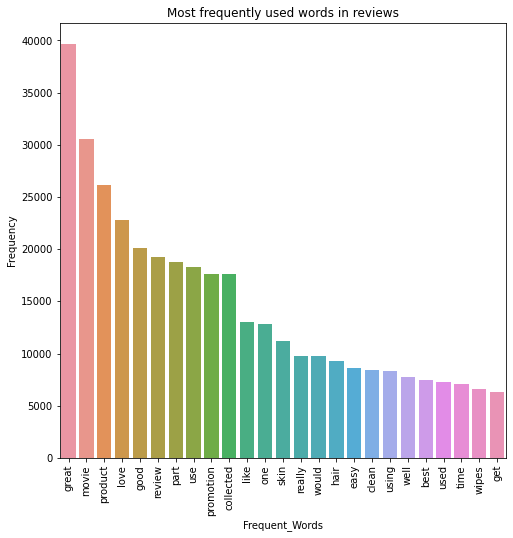

In [ ]:
plt.figure(figsize=(8, 8))
plt.xticks(rotation=90)
plt.title("Most frequently used words in reviews")
sns.barplot(x="Frequent_Words", y="Frequency", data=word_frequency)

In [ ]:
lemmatizer_output = WordNetLemmatizer()

reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: word_tokenize(x.lower())
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [word for word in x if word not in STOPWORDS]
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [lemmatizer_output.lemmatize(word) for word in x]
)
reviews_df["full_review"] = reviews_df["full_review"].apply(lambda x: " ".join(x))

In [ ]:
reviews_df['full_review'].head(15)

0     awesome love album good hip hop side current p...
1     perfect workstation used seagate fan yr warran...
2     work well enclosure installed enclosure hooked...
3     good brand used seagate fan yr warranty hard r...
4     great product fantastic product sata cable fit...
5     good husband installed computer couldnt find d...
6     drive work ok configure drive level raid dns u...
7     work great replaced another hard drive really ...
8     bad price ups down installing physically easy ...
9     cheap barebones three year warranty hard perfe...
10    excellent product memory card sony alpha digit...
11    great bang buck ordered build computer one wor...
12    nice price chose one based price ive toshiba d...
13    excellent price preformed expected wonderful p...
14    great amount space price purchased son replace...
Name: full_review, dtype: object

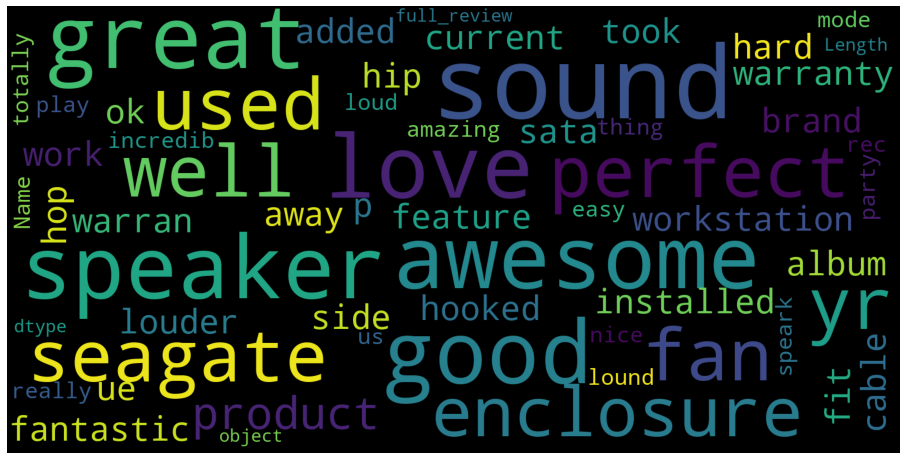

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=250,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(reviews_df["full_review"])


[Text(0.5, 1.0, 'Frequency of each rating')]

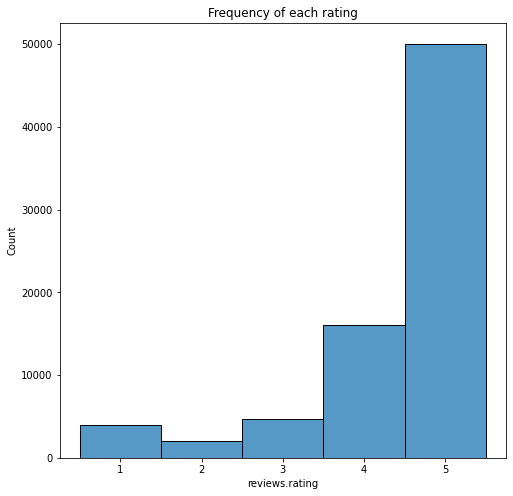

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=reviews_df, x=reviews_df['reviews.rating'], discrete="True").set(title = "Frequency of each rating")

In [ ]:
#review by brand
reviews_df.groupby(reviews_df['brand']).mean()['reviews.rating']

brand
4C Foods               5.000000
AMBI                   4.750000
ANCHOR BAY             4.766667
Adesso                 5.000000
Advantage              4.000000
                         ...   
Yes to Grapefruit      3.846154
Yosemite Home Decor    1.000000
Zyliss                 4.644068
bareMinerals           5.000000
iStarUSA               3.000000
Name: reviews.rating, Length: 397, dtype: float64

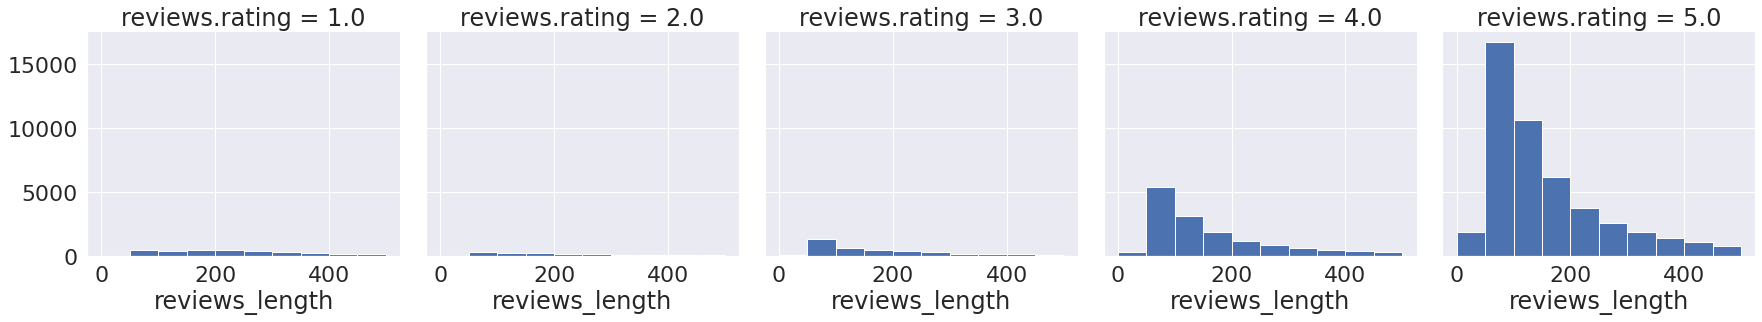

In [ ]:
reviews_df["reviews_length"] = reviews_df["reviews.text"].apply(len)
sns.set(font_scale=2.0)

graph = sns.FacetGrid(reviews_df,col='reviews.rating',size=5)
graph.map(plt.hist,'reviews_length', range=[0, 500])

In [ ]:
reviews_df['reviews.doRecommend'].fillna("N/A",inplace=True)

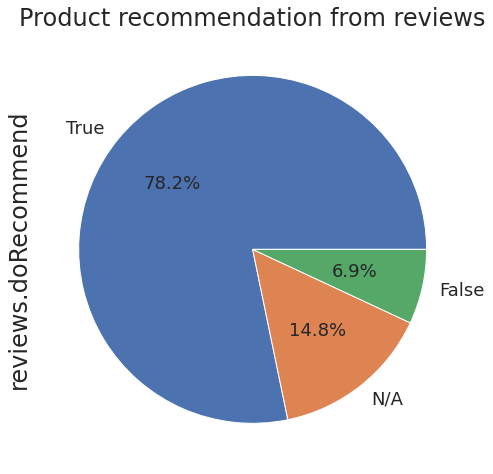

In [ ]:
plt.figure(figsize = (8,8))
plt.title("Product recommendation from reviews")
reviews_df["reviews.doRecommend"].value_counts().plot.pie(autopct="%1.1f%%",textprops={'fontsize': 18})

Text(0, 0.5, 'No. of people that found the review helpful')

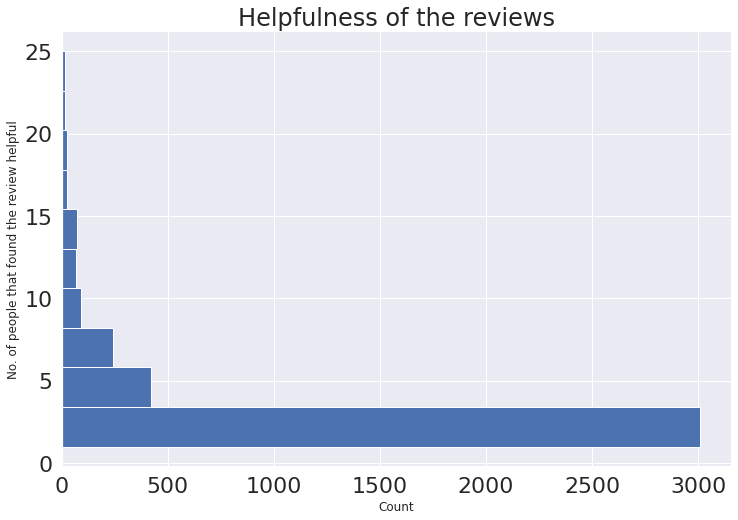

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(reviews_df['reviews.numHelpful'],range=[1, 25], orientation='horizontal')
plt.title("Helpfulness of the reviews")
plt.xlabel("Count", fontsize=12)
plt.ylabel("No. of people that found the review helpful", fontsize=12)

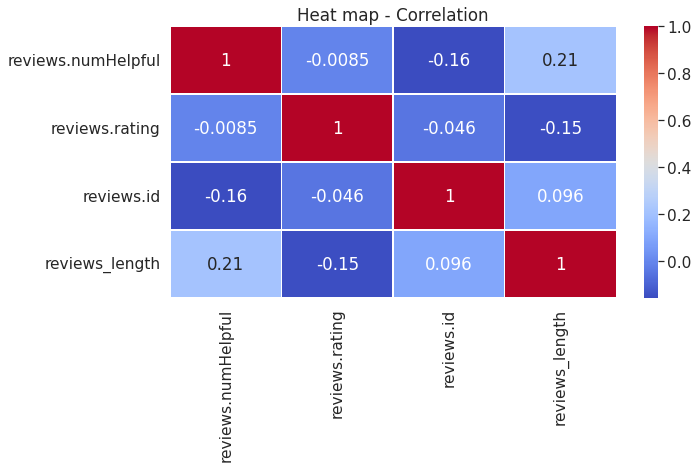

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
plt.title("Heat map - Correlation")
sns.heatmap(reviews_df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
